<a href="https://colab.research.google.com/github/DattaIn/idatta.github.io/blob/master/CDS_B1_M0_NB_Inclass_03_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Notebook Inclass 3: Statistics & Probability

## Learning Outcomes

At the end of the experiment, you will be able to :
- employ statistical tools for data exploration and analysis
- summarize data and quantify properties of a domain, given a sample of observations.

## Information



## Statistics & Probability

* **Descriptive Statistics** - Descriptive statistics are used to describe the basic features of the data in a study. They provide simple summaries about the sample and the measures.

* **Measures of central tendency and dispersion**
    - Trimmed mean, weighted mean
    - Variance, Standard Deviation
    - Quartile, InterQuartile range

* **Probability Distribution**
    - Normal Distribution
    - Skewness
    - Kurtosis

* **Measuring relationship between variables**
    - Covariance
    - Correlation




#### Importing required packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
import statistics
import seaborn as sns

In [2]:
df = pd.DataFrame({'Price':[5,4,7,6,8,10,11,0,7,18]})
df

,Price
0,5
1,4
2,7
3,6
4,8
5,10
6,11
7,0
8,7
9,18


Descriptive statistics of the dataframe

In [3]:
df.describe()

,Price
count,10.000000
mean,7.600000
std,4.788876
min,0.000000
25%,5.250000
50%,7.000000
75%,9.500000
max,18.000000


### Measures of Central Tendency: Mean, Median, and Mode



In [4]:
# Mean
print("Mean of the given dataframe",df.mean())

# Median
print("Median of the given dataframe",df.median())

Mean of the given dataframe Price    7.6
dtype: float64
Median of the given dataframe Price    7.0
dtype: float64


Not every data set has a mode.

* For example, given equal numbers of grade letter A’s, B’s, C’s, D’s, and F’s, then there is no modal grade.

* However, the mode is a useful average when we want to know the most
frequently occurring data value

In [5]:
a = [5, 3, 7, 2, 4, 4, 2, 4, 8, 3, 4, 3, 4]

print("mode of the given list is",max(set(a), key = a.count))

# Using statistics package
print("mode of the given list is",statistics.mode(a))

mode of the given list is 4
mode of the given list is 4


Trimmed Mean

In [6]:
my_trim_mean = stats.trim_mean(df['Price'].values, 0.2)

my_mean = np.mean(df['Price'])
print("Mean ",my_mean)

print("Trimmed Mean is:",my_trim_mean)

Mean  7.6
Trimmed Mean is: 7.166666666666667


Weighted Mean

In [7]:
weight = [0.5, 0.3, 0.5, 0.3, 0.5, 0.3, 0.3, 0.5, 0.3, 0.5, 0.3, 0.5, 0.3]

print("Weighted mean:",np.average(a, weights=weight))
print("mean is",np.average(a))

Weighted mean: 4.137254901960785
mean is 4.076923076923077


### Measures of Dispersion: Variance and Standard Deviation

In [8]:
print("Variance is",np.var(a))
print("Standard Deviation is",np.std(a))

Variance is 2.840236686390533
Standard Deviation is 1.6853001769389728


### Skew and Kurtosis

**Skewness**

In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive or negative, or even undefined.

  - If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
  - If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
  - If the skewness is less than -1 or greater than 1, the data are highly skewed


**Kurtosis**

Kurtosis is a measure of the combined sizes of the two tails.  It measures the amount of probability in the tails.  The value is often compared to the kurtosis of the normal distribution, which is equal to 3.  If the kurtosis is greater than 3, then the dataset has heavier tails than a normal distribution (more in the tails).  If the kurtosis is less than 3, then the dataset has lighter tails than a normal distribution (less in the tails).

This distribution has skew nums   -0.048616
dtype: float64
This distribution has kurtosis nums    0.016348
dtype: float64


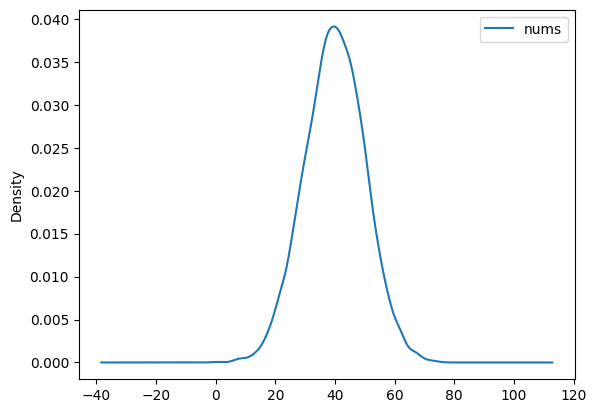

In [9]:
#Draw random samples from a normal (Gaussian) distribution
x = np.random.normal(40, 10, 10000)

# Make a dataframe to plot
norm = pd.DataFrame({'nums':x})
norm.plot(kind = 'density')

print('This distribution has skew', norm.skew())
print('This distribution has kurtosis', norm.kurt())

In [10]:
np.quantile(x, (0.25, 0.5,0.75))

array([33.16416323, 39.99518116, 46.74611562])

In [11]:
np.percentile(x, 90)

52.5904672952677

In [12]:
stats.iqr(x)

13.581952386324396

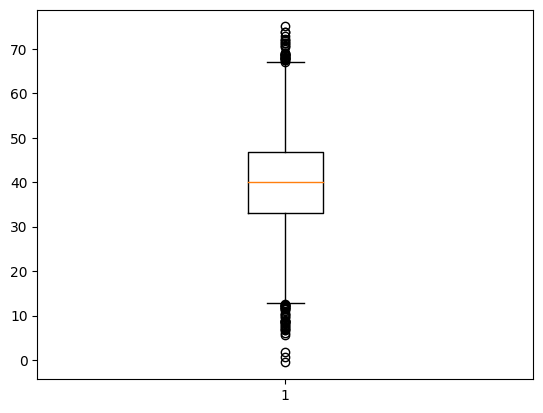

In [13]:
plt.boxplot(x)
plt.show()

### Normalization and Standardization
[Dataset description](https://developers.google.com/machine-learning/crash-course/california-housing-data-description)

In [14]:
import numpy as np

df1 = pd.read_csv("/content/sample_data/california_housing_train.csv")

total_bed_max = df1['total_bedrooms'].max()
total_bed_min =  df1['total_bedrooms'].min()
print("total bedrooms max: {} and min: {}".format(total_bed_max, total_bed_min))

total bedrooms max: 6445.0 and min: 1.0


In [15]:
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Normalization

In [16]:
from sklearn.preprocessing import normalize
total_bedrooms_array = df1['total_bedrooms'].values.reshape(1,-1)
normalized_X = normalize(total_bedrooms_array)
print(normalized_X.max(), normalized_X.min())

0.07220881117566844 1.120384967814871e-05


Standardization

In [17]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
# Fit the data on scaler object
scaled_df1 = scaler.fit_transform(df1)

scaled_df1 = pd.DataFrame(scaled_df1, columns=df1.columns)
scaled_df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,2.619365,-0.671520,-1.079671,1.361695,1.764204,-0.361184,-0.075998,-1.252543,-1.210558
1,2.539569,-0.573264,-0.761872,2.296608,3.230441,-0.261865,-0.099404,-1.081483,-1.096745
2,2.494683,-0.905463,-0.920772,-0.882462,-0.866956,-0.955354,-0.999252,-1.170105,-1.048461
3,2.489696,-0.928857,-1.159121,-0.524186,-0.480230,-0.796793,-0.715774,-0.362600,-1.154514
4,2.489696,-0.961609,-0.682422,-0.545747,-0.506328,-0.701830,-0.622148,-1.026454,-1.222629


### Covariance

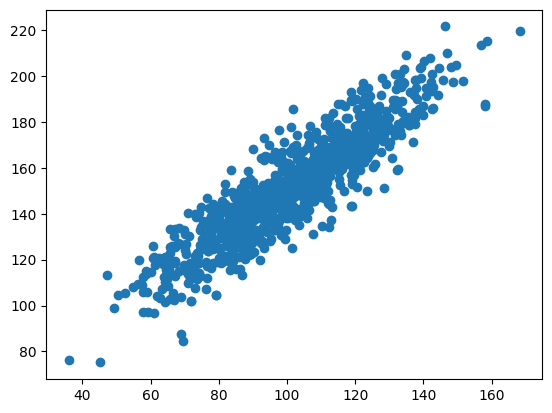

Covariance matrix 
 [[400.02200173 407.16568876]
 [407.16568876 515.86997957]]


In [18]:
data1 = 20 * np.random.randn(1000) + 100
data2 = data1 + (10 * np.random.randn(1000) + 50)

plt.scatter(data1, data2)
plt.show()

print("Covariance matrix \n",np.cov(data1, data2))

### Correlation Analysis

In [19]:
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/data_corr.csv

Covariance matrix of height and weight
 [[68.01816583 33.47224121]
 [33.47224121 82.4512201 ]]


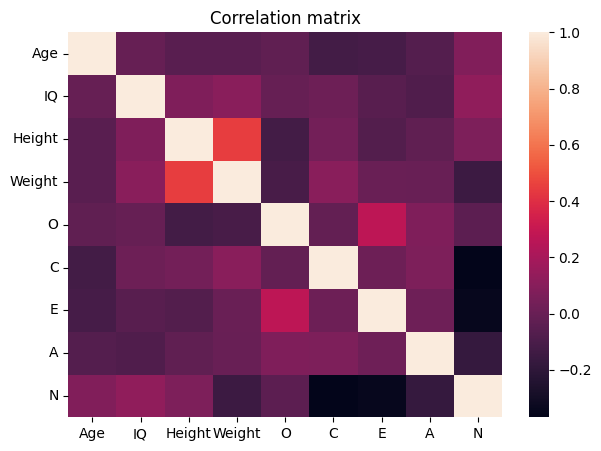

In [20]:
data_corr = pd.read_csv("data_corr.csv")

# Calculate Covariance for two variables
print("Covariance matrix of height and weight\n",np.cov(data_corr['Height'], data_corr['Weight']))

# Heatmap
plt.figure(figsize=(7, 5))
corrs = data_corr.corr()
sns.heatmap(corrs)
plt.title('Correlation matrix')
plt.show()

### Rolling Standard Deviation

In [21]:
data_corr.shape

(200, 9)

In [22]:
# Rolling standard deviation with 3
data_corr.Height.rolling(3).std()

0           NaN
1           NaN
2      5.359415
3      2.981610
4      1.855622
         ...   
195    4.266536
196    7.007377
197    7.409678
198    1.415392
199    7.996458
Name: Height, Length: 200, dtype: float64